In [1]:
import cuentitas
# from auxiliares import generadorHH, generadorVV, generadorHHVV, generadorHHVVlambda #generador, generador1E, generadorEmisividad, 

from numpy import pi, sqrt, sin, cos, exp, log10, array, real, conj
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import interpolate
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

sns.set() #seaborn como default

In [2]:
def parametro(a,data):
    if a == 'ep1':
        return data[0]
    elif a == 'ep2':
        return data[1]
    elif a == 'd':
        return data[2]
    elif a == 's1':
        return data[3]
    elif a == 's2':
        return data[4]

In [3]:
data = np.loadtxt("Datos2/DU1-M=25000e=1.5.txt", delimiter=';')


ep1 = data[0]
ep2 = data[1]
d = data[2]
s1 = data[3]
s2 = data[4]


0.001018791232132901 0.0011956619273709864
0.0010528107443530852 0.38227447656969804
0.0004478245683212758 0.23008612819805024


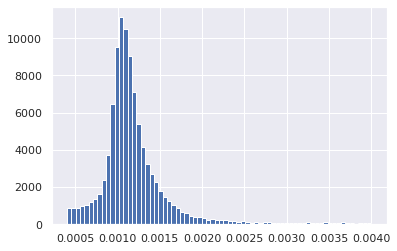

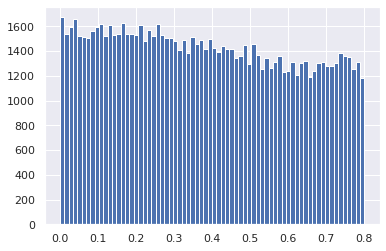

In [122]:
plt.figure()
n, b= np.histogram(s1, 70)
bin_max_s1 = np.where(n == n.max())
maxs1 = b[bin_max_s1][0]
medias1 = np.mean(s1)
stds1 = np.std(s1)
plt.hist(s1,70)

plt.figure()
nd, bd= np.histogram(d, 70)
bin_max_d = np.where(nd == nd.max())
maxd = bd[bin_max_d][0]
mediad = np.mean(d)
stdd = np.std(d)
plt.hist(d,70)

print(maxs1,medias1)
print(maxd,mediad)
print(stds1,stdd)

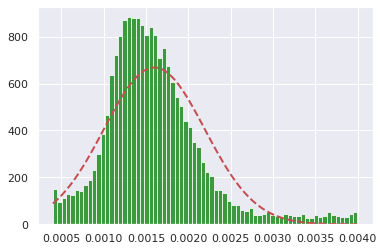

In [27]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.stats import norm


# s11 = np.dot(s1,1/max(s1))

(mu, sigma) = norm.fit(s1)

n, bins, patches = plt.hist(s1, 70, facecolor='green', alpha=0.75, density=True, stacked=True)

y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

media: , 5.196955398821325 
desviacion: , 2.402659448369541
[0.04363827 0.05901486]
1.4005807103196053 , 7.904996919979004


Text(0, 0.5, 'Conteo')

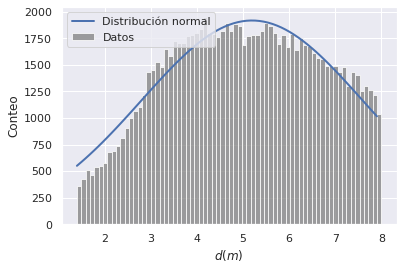

In [6]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

aux = 'ep2'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/4)

cotai = int(bin_max[0] - cota)
cotax = int(bin_max[0] + cota)
x = b[cotai:cotax]
y = n[cotai:cotax]

x = b[:-1]
y = n[:]

# x = b[cota:]
# y = n[cota-1:]
# x = b[:cota]
# y = n[:cota]

popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000)#, p0=[10000,0.00075,0.00025])
#                        , p0=[3100,0.00075,0.00025])


if aux == 'd' or aux == 's1' or aux == 's2':
    med = popt[1]*100
    desv = popt[2]*100
else:
    med = popt[1]
    desv = popt[2]

print('media: ,', med, '\n'+'desviacion: ,', desv)
print(np.sqrt(np.diag(pcov))[1:])

print(x[0],',',x[-1])

n, bins, patches = plt.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Datos')#, density=True, stacked=True)
plt.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend()
plt.xlabel('$ d(m)$')
plt.ylabel('Conteo')
# plt.savefig('d-uniforme.png', dpi = 300)


In [9]:
print(np.sqrt(np.diag(pcov))[1:][0])

0.04363827270870501


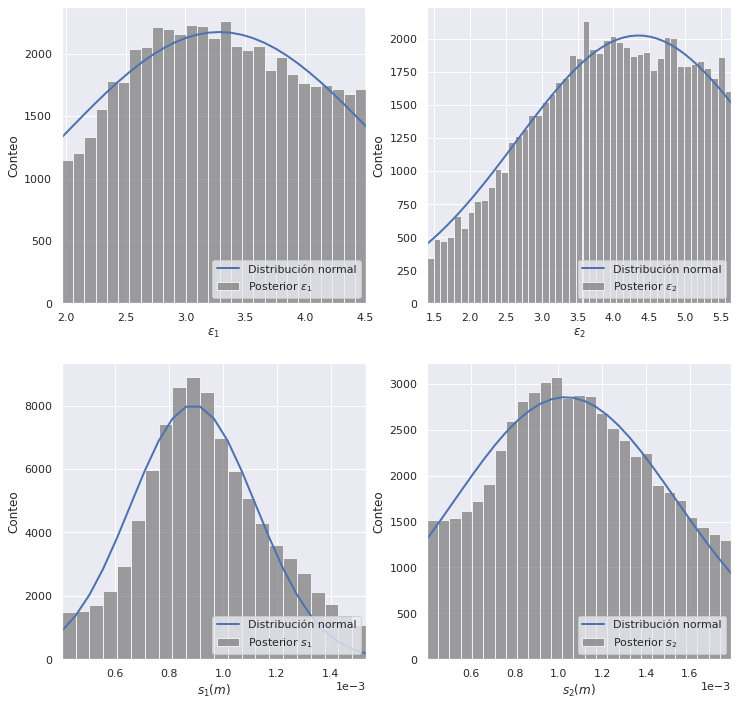

In [119]:
data = np.loadtxt("Datos2/DU2-M=25000e=1.5.txt", delimiter=';')

f1 = plt.figure(figsize = (12,12))
f1.tight_layout()

##### ep1 ######
aux = 'ep1'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/5)

cotai = int(bin_max[0] - cota)
cotax = int(bin_max[0] + cota)
x = b[cotai:cotax]
y = n[cotai:cotax]
popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000)

g = f1.add_subplot(2,2,1)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $\epsilon_1$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(1.9658067803106207, 4.511003721101538)
plt.xlabel('$\epsilon_1$')
plt.ylabel('Conteo')
###############

##### ep2 ######
aux = 'ep2'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/3)

cotai = int(bin_max[0] - cota)
cotax = int(bin_max[0] + cota)
x = b[cotai:cotax]
y = n[cotai:cotax]
popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000)

g = f1.add_subplot(2,2,2)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $\epsilon_2$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(1.40177960350983, 5.642413085691535)
plt.xlabel('$\epsilon_2$')
plt.ylabel('Conteo')
###############

##### s1 ######
aux = 's1'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/3)

x = b[:cota]
y = n[:cota]

popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000, p0=[10000,0.00075,0.00025])

g = f1.add_subplot(2,2,3)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $s_1$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(0.00040065753785651725, 0.0015310009264146314)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('$s_1(m)$')
plt.ylabel('Conteo')
###############

##### s1 ######
aux = 's2'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/2.5)

x = b[:cota]
y = n[:cota]

popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000, p0=[10000,0.00075,0.00025])

g = f1.add_subplot(2,2,4)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $s_2$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(0.0004000951740033132, 0.001788491846401296)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('$s_2(m)$')
plt.ylabel('Conteo')
###############

plt.savefig('gausianasDU2.png', dpi = 300)

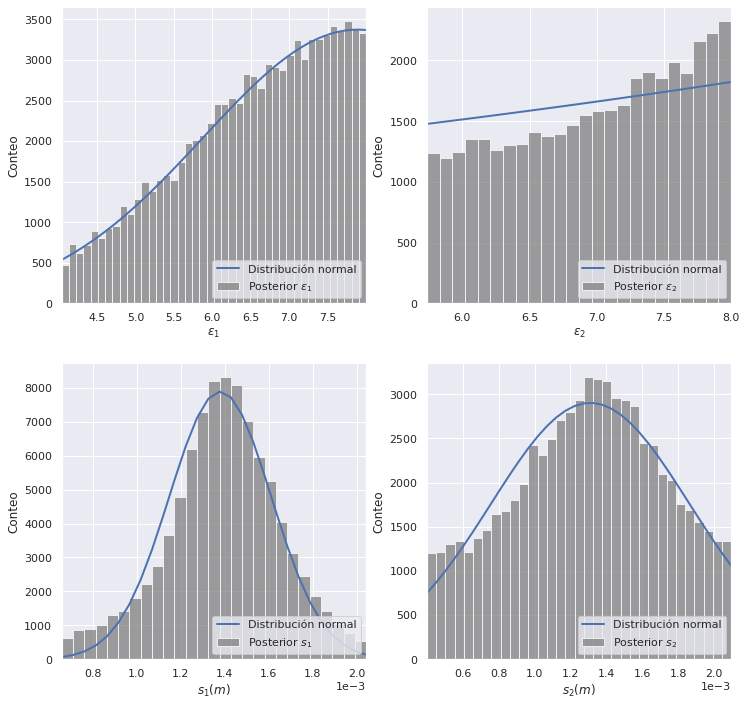

In [145]:
data = np.loadtxt("Datos2/HU1-M=25000e=1.5.txt", delimiter=';')

f1 = plt.figure(figsize = (12,12))
f1.tight_layout()

##### ep1 ######
aux = 'ep1'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/5)

x = b[cota:]
y = n[cota-1:]

popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000)

g = f1.add_subplot(2,2,1)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $\epsilon_1$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(4.040895861558449, 7.99985448351582)
plt.xlabel('$\epsilon_1$')
plt.ylabel('Conteo')
###############

##### ep2 ######
aux = 'ep2'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/3)

x = b[cota:]
y = n[cota-1:]
popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000)

g = f1.add_subplot(2,2,2)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $\epsilon_2$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(5.736576235604733 , 8)
plt.xlabel('$\epsilon_2$')
plt.ylabel('Conteo')
###############

##### s1 ######
aux = 's1'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/5)

cotai = int(bin_max[0] - cota)
cotax = int(bin_max[0] + cota)
x = b[cotai:cotax]
y = n[cotai:cotax]

popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000, p0=[10000,0.00075,0.00025])

g = f1.add_subplot(2,2,3)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $s_1$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(0.0006590813634673688 , 0.002043378256456478)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('$s_1(m)$')
plt.ylabel('Conteo')
###############

##### s1 ######
aux = 's2'
param = parametro(aux,data)
n, b= np.histogram(param, 70)

bin_max = np.where(n == n.max())
cota = int(len(n)/4)

cotai = int(bin_max[0] - cota)
cotax = int(bin_max[0] + cota)
x = b[cotai:cotax]
y = n[cotai:cotax]

popt, pcov = curve_fit(gaus,x,y,maxfev = 1000000, p0=[10000,0.00075,0.00025])

g = f1.add_subplot(2,2,4)

n, bins, patches = g.hist(param, 70, facecolor='grey', alpha=0.75, label = 'Posterior $s_2$')#, density=True, stacked=True)
g.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend(loc=4)
plt.xlim(0.0004001855407248617 , 0.002097202769591345)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('$s_2(m)$')
plt.ylabel('Conteo')
###############

plt.savefig('gausianasHU1.png', dpi = 300)

In [88]:
n, b= np.histogram(d, 70)
y = n
x = b[1:]

# print(n, np.sum(y))
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,maxfev = 8000)#,p0=[1,mean,sigma])

print('media: ', popt[1], '\n'+'desviacion: ', popt[2])

# plt.plot(x,y,'b+:',label='data')
n, bins, patches = plt.hist(d, 70, facecolor='grey', alpha=0.75, label = 'Datos')#, density=True, stacked=True)
plt.plot(x,gaus(x,*popt),'b',label='Distribución normal', linewidth = 2)
plt.legend()
plt.xlabel('d (m)')
plt.ylabel('Conteo')
plt.savefig('d-posterior.png', dpi = 300)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 8000.

media:  0.0015066538348304848 
desviacion:  -0.0004309506872229805
media:  0.6722178930066195 
desviacion:  0.5241769990182631


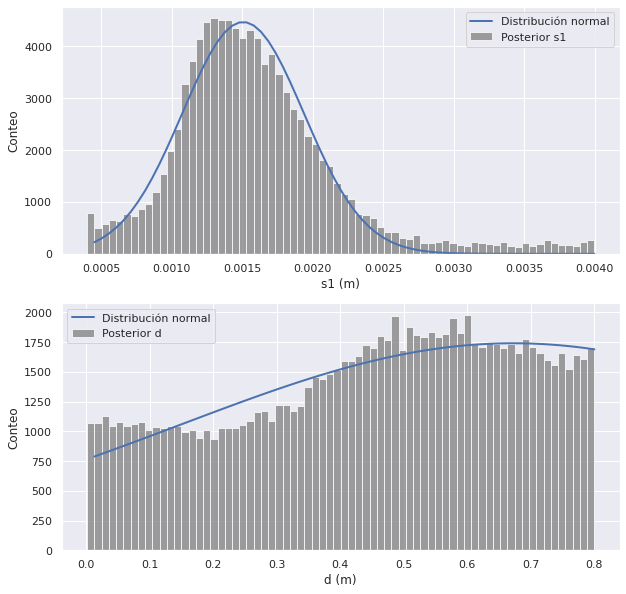

In [67]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


n, b= np.histogram(s1, 70)
y = n
x = b[1:]
popts1,pcov = curve_fit(gaus,x,y,maxfev = 8000)#,p0=[1,mean,sigma])

print('media: ', popts1[1], '\n'+'desviacion: ', popts1[2])

nd, bd= np.histogram(d, 70)
yd = nd
xd = bd[1:]
poptd,pcov = curve_fit(gaus,xd,yd,maxfev = 8000)#,p0=[1,mean,sigma])

print('media: ', poptd[1], '\n'+'desviacion: ', poptd[2])

f1 = plt.figure(figsize = (10,10))
g = f1.add_subplot(2,1,1)

n, bins, patches = g.hist(s1, 70, facecolor='grey', alpha=0.75, label = 'Posterior s1')#, density=True, stacked=True)
g.plot(x,gaus(x,*popts1),'b',label='Distribución normal', linewidth = 2)
plt.legend()
plt.xlabel('s1 (m)')
plt.ylabel('Conteo')


g = f1.add_subplot(2,1,2)

n, bins, patches = g.hist(d, 70, facecolor='grey', alpha=0.75, label = 'Posterior d')#, density=True, stacked=True)
g.plot(xd,gaus(xd,*poptd),'b',label='Distribución normal', linewidth = 2)
plt.legend()
plt.xlabel('d (m)')
plt.ylabel('Conteo')


plt.savefig('Posteriores_s1-d.png', dpi=300)

In [55]:
plotear = np.stack((ep1,ep2,d,s1,s2)).T
dfplotear = pd.DataFrame(plotear, columns = ['ep1','ep2','d','s1','s2'])

In [56]:
modelInReduced = [1.2,
                  5.0,
                  0.05,
                  0.0048,
                  0.0021]
#valores reportados en paper de titan

/opt/conda/lib/python3.7/site-packages/scipy/stats/kde.py:263: RuntimeWarning: divide by zero encountered in true_divide
  result = result / self._norm_factor
/opt/conda/lib/python3.7/site-packages/scipy/stats/kde.py:263: RuntimeWarning: invalid value encountered in true_divide
  result = result / self._norm_factor
/opt/conda/lib/python3.7/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/conda/lib/python3.7/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


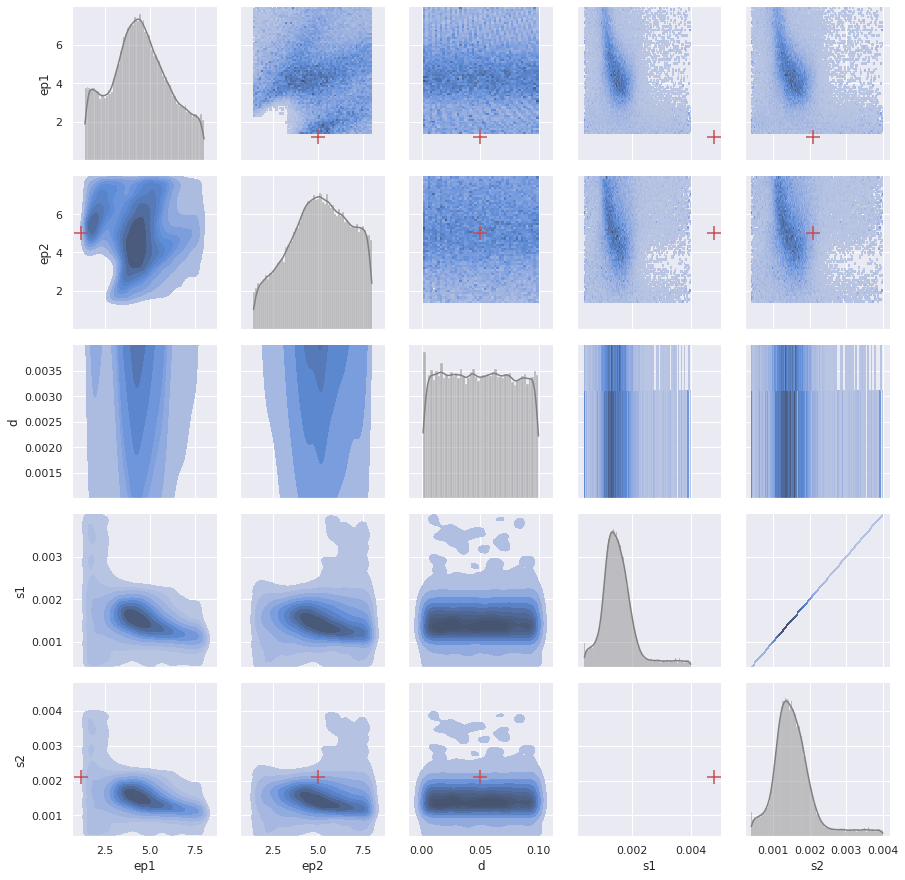

In [58]:
f = sns.PairGrid(dfplotear)
# f.fig.suptitle(Nombre, y=1.01, fontsize = 'large')
f.map_upper(sns.histplot)

f.map_lower(sns.kdeplot, fill=True)
f.map_diag(sns.histplot, kde=True, color='.5')


for i in range(5):
    for j in range(5):
        if i == j:
            #ploteo el valor verdadero en las marginales
#             f.axes[j,i].axvline(modelInReduced[i], color='r', linestyle='dashed', linewidth=1)
#             mmin = np.min(data[i])
#             mmax = np.max(data[i])
#             if mmin < modelInReduced[i] and mmax > modelInReduced[i]:
#                 f.axes[i,j].set_xlim(mmin,mmax)
#             elif modelInReduced[i] < mmin:
#                 f.axes[i,j].set_xlim(modelInReduced[i],mmax)
#             elif modelInReduced[i] > mmax:
#                 f.axes[i,j].set_xlim(mmin,modelInReduced[i])
           pass
        else:
            f.axes[j,i].scatter(modelInReduced[i], modelInReduced[j], marker="+", c='r', s=200) #color='k', linestyle='dashed', linewidth=1)
            mmin_x = np.min(data[j])
            mmin_y = np.min(data[i])
            mmax_x = np.max(data[j])
            mmax_y = np.max(data[i])
            if mmin_x < modelInReduced[i] and mmax_x > modelInReduced[i]:
                f.axes[j,i].set_ylim(mmin_x,mmax)
            elif modelInReduced[i] < mmin_x:
                f.axes[j,i].set_ylim(modelInReduced[i],mmax_x)
            elif modelInReduced[i] > mmax_x:
                f.axes[j,i].set_ylim(mmin_x,modelInReduced[i])
            
#         f.axes[j,i].xaxis.set_label_text(xlabels[i])
#         f.axes[j,i].yaxis.set_label_text(ylabels[j])
#         f.axes[j,i].xaxis.set_label_text(xlabels[i])
#         f.axes[j,i].scatter(1,1)
